In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

train = pd.read_csv('/content/drive/MyDrive/2022-2 여름방학 와이빅타/ml/movies_train.csv')
test = pd.read_csv('/content/drive/MyDrive/2022-2 여름방학 와이빅타/ml/movies_test.csv')

# 데이터 전처리

In [4]:
# 결측치가 많은 데이터 제거
train = train.drop(['dir_prev_bfnum'],axis = 1)
test =  test.drop(['dir_prev_bfnum'],axis = 1)

In [5]:
# 감독명 : 너무 다양해서 제거
train = train.drop(['director'],axis = 1)
test = test.drop(['director'],axis = 1)

In [6]:
# 제목 : 의미가 없기 때문에 제거
train = train.drop(['title'],axis= 1)
test = test.drop(['title'],axis= 1)

In [7]:
# 상위 5개의 배급사를 제외하고 '기타'로처리
distributor_list = train.distributor.value_counts()[:5]
def func(distributor):
    if distributor in distributor_list:
        return distributor
    else:
        return '기타'

train['distributor'] = train['distributor'].apply(lambda x : func(x))
test['distributor'] = test['distributor'].apply(lambda x : func(x))

In [8]:
# 개봉일을 바탕으로 년,월 변수 생성
train['년'] = train['release_time'].apply(lambda x: int(x[:4]))
train['월'] = train['release_time'].apply(lambda x: int(x[5:7]))
train =  train.drop(['release_time'],axis = 1)

test['년'] = test['release_time'].apply(lambda x: int(x[:4]))
test['월'] = test['release_time'].apply(lambda x: int(x[5:7]))
test =  test.drop(['release_time'],axis = 1)

In [9]:
# 원핫 인코딩
train = pd.get_dummies(train)
test = pd.get_dummies(test)

# 모델 생성 및 예측(과제부분)

In [10]:
train_x = train.drop(['box_off_num'],axis= 1)
train_y = train['box_off_num']

In [28]:
model=RandomForestRegressor()
model.fit(train_x,train_y)

from sklearn.model_selection import GridSearchCV

max_depth = [30,40,50,60,70]
min_samples_leaf = [1,2,3,4,5]
min_samples_split =[6,8,10,12,14]
parameter_grid = {'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf, 'min_samples_split': min_samples_split}

In [29]:
gs = GridSearchCV(estimator = model, param_grid = parameter_grid, cv=5, scoring='neg_mean_squared_error', error_score='raise') 
gs.fit(train_x, train_y)

GridSearchCV(cv=5, error_score='raise', estimator=RandomForestRegressor(),
             param_grid={'max_depth': [30, 40, 50, 60, 70],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [6, 8, 10, 12, 14]},
             scoring='neg_mean_squared_error')

In [34]:
print('GridSearch 최고 Validation Score: {:.3f}'.format(-gs.best_score_))
print('GridSearch 최적 parameter: {}'.format(gs.best_params_))

GridSearch 최고 Validation Score: 2059163851736.850
GridSearch 최적 parameter: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [35]:
bt = gs.best_estimator_
bt.fit(train_x, train_y)

RandomForestRegressor(max_depth=30, min_samples_leaf=4, min_samples_split=10)

In [36]:
best_pred = bt.predict(test)

# 제출

In [37]:
submission = pd.read_csv('/content/drive/MyDrive/2022-2 여름방학 와이빅타/ml/submission.csv')
submission

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0
...,...,...
238,해에게서 소년에게,0
239,울보 권투부,0
240,어떤살인,0
241,말하지 못한 비밀,0


In [38]:
submission['box_off_num'] = best_pred

In [39]:
submission

,title,box_off_num
0,용서는 없다,2.698112e+06
1,아빠가 여자를 좋아해,1.098285e+06
2,하모니,1.522726e+06
3,의형제,1.694162e+06
4,평행 이론,1.388170e+06
...,...,...
238,해에게서 소년에게,2.204757e+05
239,울보 권투부,3.923279e+03
240,어떤살인,2.613494e+05
241,말하지 못한 비밀,2.656859e+04


In [40]:
submission.to_csv('베이스라인.csv',index = False)

# 제출 점수(과제부분)

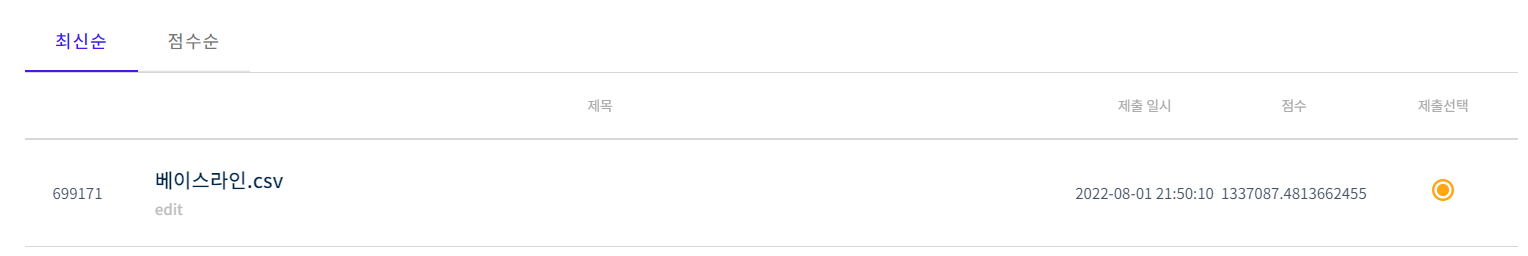